# Question -- 2 
- Data collected from the NYT API Documentation
- The collected data is stored in the local harddisk using relative address path
- Followed by three analysis is performed

In [48]:
# Program to download the NYT data using API key for "ARCHIVE" 
# This collected is stored in the harddisk
import os
import requests
import json
url = []
url.append("https://api.nytimes.com/svc/archive/v1/1988/8.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/9.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/10.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/11.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/12.json")
outputlist=[]
for x in range(len(url)):
    outputlist.append(requests.get(url[x]+"?api-key=0715f983b3e448249d5387d2f521baf2").json())  
    outputfol='data/NYTAPI'
    path = (outputfol+'\\'+str("archive"+outputlist[x]['response']['docs'][0]['pub_date'][:7])+'.json')
    if not os.path.exists(outputfol):
            os.makedirs(outputfol)
    if not os.path.exists(path):
            with open(path, 'w') as outfile:
                json.dump(outputlist, outfile)
                print(repr(x+1)+" Json dumped in folder")
    else:
        print(repr(x+1)+" Json already present")    

1 Json already present
2 Json already present
3 Json already present
4 Json already present
5 Json already present


In [46]:
# Program to download the NYT data using API key for "BOOKS - Names" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist1=[]
outputlist1 = requests.get("https://api.nytimes.com/svc/books/v3/lists/names.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'BookListNames'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist1, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json already present


In [102]:
# Program to download the NYT data using API key for "BOOKS - Overview" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist2=[]
outputlist2 = requests.get("https://api.nytimes.com/svc/books/v3/lists/overview.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'BookListOverview'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist2, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json already present


In [104]:
# Program to download the NYT data using API key for "Article" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist2=[]
outputlist2 = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'articlesearch'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist2, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json dumped in folder


### The data is collected and stored in the local hard drive 

# Analysis -- 1 
- Finding the first publication date and latest publication date of a book
- Finding the period how long each book has been evolved in the society
- Finally the oldest book will taken out as an output of the analysis_1
- The evolution data of each book will be stored in a CSV file
- Graph will be plotted for easy understanding.

In [386]:
# Under the API Book - Names, which is stored in the list "outputlist1"
# To get the data for First publication date of each book 
import nltk
from nltk import FreqDist
First_PubDate = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    First_PubDate.append(outputlist1['results'][x]['oldest_published_date'])
print(len(First_PubDate))

53


In [385]:
# To get the data for latest publication date of each book 
import nltk
from nltk import FreqDist
Last_PubDate = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    Last_PubDate.append(outputlist1['results'][x]['newest_published_date'])
print(len(Last_PubDate))

53


In [387]:
# converting the date string to required format in year, month and day
import datetime
First_PubDate_formated = []
for f in range(len(First_PubDate)):
    First_PubDate_formated.append(datetime.datetime.strptime(First_PubDate[f], '%Y-%m-%d'))
    
Last_PubDate_formated = []
for l in range(len(Last_PubDate)):
    Last_PubDate_formated.append(datetime.datetime.strptime(Last_PubDate[l], '%Y-%m-%d'))

# To get the Evolution period of each book the first published date is subracted from last Published date
Evolution_days = []
for e in range(len(First_PubDate_formated)):
    Evolution_days.append((Last_PubDate_formated[e]-First_PubDate_formated[e]).days)
print(len(Evolution_days))

53


In [295]:
# To get the data for each book name
import nltk
from nltk import FreqDist
Display_name = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    Display_name.append(outputlist1['results'][x]['display_name'])
len(Display_name)

53

In [297]:
# joining the display name of book and their evolution period in days together

Book_Evolution = dict(zip(Display_name,Evolution_days))

In [388]:
#For the top 10, displaying of the Book's names with most evolution period along with their ranks
rank1 = 0
print ("Name of the BOOK".ljust(30) +  "   \t   " + "Rank".ljust(10) + "\t"+ "Evolution Period in days")
for w in sorted(Book_Evolution, key=Book_Evolution.get, reverse=True) [:10]:
    rank1 = rank1 + 1 
    print (repr(w).ljust(30) +  "   \t   " + repr(rank1).ljust(10) + "\t" + repr(Book_Evolution[w]))

Name of the BOOK                 	   Rank      	Evolution Period in days
'Children’s Series'              	   1         	3199
'Children’s Picture Books'       	   2         	3199
'Hardcover Fiction'              	   3         	3199
'Paperback Trade Fiction'        	   4         	3199
'Hardcover Nonfiction'           	   5         	3199
'Paperback Nonfiction'           	   6         	3199
'Paperback Mass-Market Fiction'   	   7         	3157
'Manga'                          	   8         	2877
'Hardcover Graphic Books'        	   9         	2877
'Paperback Graphic Books'        	   10        	2877


In [367]:
# Sperating the disctionery into two list with respective headings
xaxis = ["Name of the BOOK"]
yaxis = ["Evolution Period in Days"]

for w in sorted(Book_Evolution, key=Book_Evolution.get, reverse=True):
    xaxis.append(w)
    yaxis.append(Book_Evolution[w])

In [374]:
#Writing the above printed outputs along with headings to a CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
rank = 0
rank2 = ['Rank']
if not os.path.exists('ana_[1-3]'):     
    os.mkdir('ana_[1-3]')
with open ('ana_[1-3]/Q2_A1_BookEvolution.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range(len(xaxis)):
        rank = rank + 1
        rank2.append(rank) 
        w.writerow([xaxis[i], rank2[i],  yaxis[i]])

In [376]:
# For plotting the graph the heading is removed.
if xaxis[0] == "Name of the BOOK":
    del xaxis[0]
if yaxis[0] == "Evolution Period in Days":
    del yaxis[0]
if rank2[0] == "Rank":
    del rank2[0]

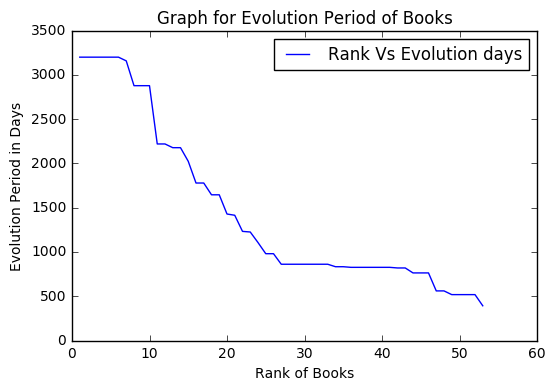

In [383]:
# Graph plotted for the Book's rank which has most highest number of Evolution days against the Evolution period in days
import matplotlib.pyplot as plt
plt.plot(rank2,yaxis, label="Rank Vs Evolution days")
plt.xlabel('Rank of Books')
plt.ylabel('Evolution Period in Days')
plt.title("Graph for Evolution Period of Books")
plt.legend()
plt.show()

### Conclusion of Analysis -- 1
*From the above analysis it is clearly seen that the book "Children’s Series" has taken the rank 1 position which has highest period of days evolved*


# Analysis -- 2
- Finding the first publication date and latest publication date of a book
- Finding the period how long each book has been evolved in the society
- Finally the oldest book will taken out as an output of the analysis_1
- The evolution data of each book will be stored in a CSV file
- Graph will be plotted for easy understanding.

In [393]:
outputlist[0]['response']['docs'][0]

{'_id': '4fd17a688eb7c8105d67208d',
 'abstract': None,
 'blog': [],
 'byline': {'original': 'By JEFFREY SCHMALZ',
  'person': [{'firstname': 'Jeffrey',
    'lastname': 'SCHMALZ',
    'organization': '',
    'rank': 1,
    'role': 'reported'}]},
 'document_type': 'article',
 'headline': {'main': 'Cuomo vs. Legislators: Hand-to-Hand Combat Over Shoreham'},
 'keywords': [{'name': 'persons', 'value': 'CUOMO, MARIO M'},
  {'name': 'glocations', 'value': 'LONG ISLAND (NY)'},
  {'name': 'organizations', 'value': 'SHOREHAM NUCLEAR POWER PLANT'},
  {'name': 'organizations', 'value': 'LONG ISLAND LIGHTING CO'},
  {'name': 'subject', 'value': 'ELECTION ISSUES'},
  {'name': 'subject', 'value': 'ATOMIC ENERGY'},
  {'name': 'subject', 'value': 'ELECTRIC LIGHT AND POWER'},
  {'name': 'subject', 'value': 'RATES'}],
 'lead_paragraph': "LEAD: During his monthly statewide radio program last week, Governor Cuomo defended his plan to close the Shoreham nuclear power plant, making a rare direct emotional pl